In [23]:
from tqdm import tqdm
import pandas as pd
import numpy as np

billboard_features=pd.read_excel("/content/BillBoard_Features.xlsx")
billboard_features

spotify_id                         artist              song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode
0     285pBltuF7vW8TeWk8hdRR                     Juice WRLD           Lucid Dreams          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0
1     7dt6x5M1jzdTEt8oCbisTK                    Post Malone             Better Now          0.68    0.58   10     -5.80         0.04          0.33              0.00      0.14     0.34 145.04       231267     1
2     78QR3Wp35dqAhFEc2qAGjE               Lil Baby & Gunna          Drip Too Hard          0.90    0.66    1     -6.90         0.29          0.09              0.00      0.53     0.39 112.51       145543     0
3     2xLMifQCjDGFmkHkpNLD9h                   Travis Scott             Sicko Mode          0.83    0.73    8     -3.71         0.22          0.01              0.00      0.12     0.45 155.01       312820     1
4     2iUXsYOEPhVqEBwsqP70rE            5 Seconds Of Summer             Youngblood          0.60    0.85    7     -5.11         0.46          0.02              0.00      0.12     0.15 120.27       203418     0
...                      ...                            ...                    ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...
9324  6rQ9ypCfSRZs2AqqobvXu3                The 2 Live Crew            Me So Horny          0.89    0.52    1    -11.16         0.10          0.00              0.00      0.08     0.95 132.74       260441     1
9325  0UAEHlFR79k9CJvknSGUNf   Technotronic Featuring Felly        Pump Up The Jam          0.87    0.91   10     -7.38         0.12          0.02              0.00      0.05     0.68 124.81       215040     0
9326  7MZzwdBfX8Dq0xFLFfxtdJ   Mantronix Featuring Wondress  Got To Have Your Love          0.76    0.51   10    -13.67         0.08          0.18              0.00      0.05     0.96 105.63       383333     0
9327  6q989QMsV87X9Em9J6DONi  Entouch Featuring Keith Sweat               All Nite          0.83    0.48   11    -13.04         0.05          0.05              0.00      0.10     0.93 107.60       368467     1
9328  0YcUNHmnt35v7J7amKvgR4      Prince With Sheena Easton      The Arms Of Orion          0.60    0.32    2    -14.67         0.03          0.56              0.00      0.09     0.39 129.69       302973     1

[9329 rows x 15 columns]

In [24]:
msd_features = pd.read_excel("/content/MSD_Features.xlsx")
msd_features


spotify_id                 artist                                    song_name  year  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode
0     5JeyXbf7CrVQ8DqwFikN0P       Sonora Santanera                              Amor De Cabaret  2016          0.70    0.52    8     -6.42         0.03          0.69              0.00      0.94     0.68 102.46       183027     1
1     5uN6oY2NGLC6GKoywHKkZA           JennyAnyKind                              Young Boy Blues  2000          0.46    0.57    5     -9.16         0.05          0.00              0.00      0.10     0.20 146.61       218907     0
2     01TR6aAKrA2cI3Z0gnCOsu                 Casual                             I Didn't Mean To  1994          0.75    0.55    6    -10.51         0.43          0.06              0.00      0.11     0.55  92.22       218933     0
3     7ERvcsBBYzSHqQQqlI9xAN  Jeff And Sheri Easter  The Moon And I (Ordinary Day Album Version)  2006          0.46    0.47    5     -8.33         0.03          0.71              0.00      0.08     0.29 147.56       267640     1
4     6dfppQDZQ4x3fCs6N89kV3  Tweeterfriendly Music                                 Drop of Rain  2003          0.50    0.30    7    -10.72         0.04          0.55              0.00      0.10     0.18 100.31       189560     1
...                      ...                    ...                                          ...   ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...
5598  7xV2k7FEMtUT4IUu4L87it       David Arkenstone                          The Forgotten Lands  1996          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1
5599  3e0tyTV5FiV1bcYeRjdDz2              Moonspell                               The Hanged Man  1998          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0
5600  2CQwzG5nbS7ys8CHSlavVg    Seventh Day Slumber                               Shattered Life  2005          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0
5601  0MS1NrmBWaCpPLFEXV0VMZ          It Dies Today                  One the road (to Damnation)  2006          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1
5602  62wqW6Q9eTozrruWPt9Z9i         Danny Williams             The Wonderful World Of The Young  1998          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1

[5603 rows x 16 columns]

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.monospace'] = 'Ubunto Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (16,10)

import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

In [16]:
billboard_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9329 entries, 0 to 9328
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             9328 non-null   object 
 1   Artist            9327 non-null   object 
 2   SpotifyID         9329 non-null   object 
 3   danceability      9329 non-null   float64
 4   energy            9329 non-null   float64
 5   key               9329 non-null   int64  
 6   mode              9329 non-null   int64  
 7   speechiness       9329 non-null   float64
 8   acousticness      9329 non-null   float64
 9   instrumentalness  9329 non-null   float64
 10  liveness          9329 non-null   float64
 11  valence           9329 non-null   float64
 12  tempo             9329 non-null   float64
 13  duration_ms       9329 non-null   int64  
 14  loudness          9329 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 1.1+ MB


In [17]:
billboard_features.shape

(9329, 15)

In [18]:
msd_features.shape

(5603, 18)

In [25]:
df1 = billboard_features.drop_duplicates(subset=['spotify_id'])
df2 = msd_features.drop_duplicates(subset=['spotify_id'])

In [26]:
#after merging df1 and df2 we get 14735 values out of which 9281 values are null in years column, so droping it 
14735-9281

5454

In [33]:
billboard_features.shape

(9329, 15)

In [34]:
msd_features.shape

(5603, 16)

In [36]:
df2.drop(columns=['year'],inplace=True)
df2

spotify_id                 artist                                    song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode
0     5JeyXbf7CrVQ8DqwFikN0P       Sonora Santanera                              Amor De Cabaret          0.70    0.52    8     -6.42         0.03          0.69              0.00      0.94     0.68 102.46       183027     1
1     5uN6oY2NGLC6GKoywHKkZA           JennyAnyKind                              Young Boy Blues          0.46    0.57    5     -9.16         0.05          0.00              0.00      0.10     0.20 146.61       218907     0
2     01TR6aAKrA2cI3Z0gnCOsu                 Casual                             I Didn't Mean To          0.75    0.55    6    -10.51         0.43          0.06              0.00      0.11     0.55  92.22       218933     0
3     7ERvcsBBYzSHqQQqlI9xAN  Jeff And Sheri Easter  The Moon And I (Ordinary Day Album Version)          0.46    0.47    5     -8.33         0.03          0.71              0.00      0.08     0.29 147.56       267640     1
4     6dfppQDZQ4x3fCs6N89kV3  Tweeterfriendly Music                                 Drop of Rain          0.50    0.30    7    -10.72         0.04          0.55              0.00      0.10     0.18 100.31       189560     1
...                      ...                    ...                                          ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...
5598  7xV2k7FEMtUT4IUu4L87it       David Arkenstone                          The Forgotten Lands          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1
5599  3e0tyTV5FiV1bcYeRjdDz2              Moonspell                               The Hanged Man          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0
5600  2CQwzG5nbS7ys8CHSlavVg    Seventh Day Slumber                               Shattered Life          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0
5601  0MS1NrmBWaCpPLFEXV0VMZ          It Dies Today                  One the road (to Damnation)          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1
5602  62wqW6Q9eTozrruWPt9Z9i         Danny Williams             The Wonderful World Of The Young          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1

[5560 rows x 15 columns]

In [37]:
df1

spotify_id                         artist              song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode
0     285pBltuF7vW8TeWk8hdRR                     Juice WRLD           Lucid Dreams          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0
1     7dt6x5M1jzdTEt8oCbisTK                    Post Malone             Better Now          0.68    0.58   10     -5.80         0.04          0.33              0.00      0.14     0.34 145.04       231267     1
2     78QR3Wp35dqAhFEc2qAGjE               Lil Baby & Gunna          Drip Too Hard          0.90    0.66    1     -6.90         0.29          0.09              0.00      0.53     0.39 112.51       145543     0
3     2xLMifQCjDGFmkHkpNLD9h                   Travis Scott             Sicko Mode          0.83    0.73    8     -3.71         0.22          0.01              0.00      0.12     0.45 155.01       312820     1
4     2iUXsYOEPhVqEBwsqP70rE            5 Seconds Of Summer             Youngblood          0.60    0.85    7     -5.11         0.46          0.02              0.00      0.12     0.15 120.27       203418     0
...                      ...                            ...                    ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...
9324  6rQ9ypCfSRZs2AqqobvXu3                The 2 Live Crew            Me So Horny          0.89    0.52    1    -11.16         0.10          0.00              0.00      0.08     0.95 132.74       260441     1
9325  0UAEHlFR79k9CJvknSGUNf   Technotronic Featuring Felly        Pump Up The Jam          0.87    0.91   10     -7.38         0.12          0.02              0.00      0.05     0.68 124.81       215040     0
9326  7MZzwdBfX8Dq0xFLFfxtdJ   Mantronix Featuring Wondress  Got To Have Your Love          0.76    0.51   10    -13.67         0.08          0.18              0.00      0.05     0.96 105.63       383333     0
9327  6q989QMsV87X9Em9J6DONi  Entouch Featuring Keith Sweat               All Nite          0.83    0.48   11    -13.04         0.05          0.05              0.00      0.10     0.93 107.60       368467     1
9328  0YcUNHmnt35v7J7amKvgR4      Prince With Sheena Easton      The Arms Of Orion          0.60    0.32    2    -14.67         0.03          0.56              0.00      0.09     0.39 129.69       302973     1

[9293 rows x 15 columns]

In [38]:

#unique spotify ids
df1['spotify_id'].nunique()

9293

In [39]:
#total ids - nunique ids (billboard) 
9329-9293

36

In [40]:
#unique spotify ids
df2['spotify_id'].nunique()

5560

In [41]:
#total ids - nunique ids (msd) 
5603-5560

43

In [43]:
#unique spotify ids of billboard dataset
b_id = [i for i in df1['spotify_id']]

In [44]:
#unique spotify ids of msd dataset
m_id = [i for i in df2['spotify_id']]

In [45]:
len(b_id)

9293

In [46]:
len(m_id)

5560

In [47]:
#assigning target =1 in billboard dataset as all songs are from billboard so they have obviously made it into billboard top hits
df1 = df1.assign(target = 1)
df1

spotify_id                         artist              song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
0     285pBltuF7vW8TeWk8hdRR                     Juice WRLD           Lucid Dreams          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0       1
1     7dt6x5M1jzdTEt8oCbisTK                    Post Malone             Better Now          0.68    0.58   10     -5.80         0.04          0.33              0.00      0.14     0.34 145.04       231267     1       1
2     78QR3Wp35dqAhFEc2qAGjE               Lil Baby & Gunna          Drip Too Hard          0.90    0.66    1     -6.90         0.29          0.09              0.00      0.53     0.39 112.51       145543     0       1
3     2xLMifQCjDGFmkHkpNLD9h                   Travis Scott             Sicko Mode          0.83    0.73    8     -3.71         0.22          0.01              0.00      0.12     0.45 155.01       312820     1       1
4     2iUXsYOEPhVqEBwsqP70rE            5 Seconds Of Summer             Youngblood          0.60    0.85    7     -5.11         0.46          0.02              0.00      0.12     0.15 120.27       203418     0       1
...                      ...                            ...                    ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...     ...
9324  6rQ9ypCfSRZs2AqqobvXu3                The 2 Live Crew            Me So Horny          0.89    0.52    1    -11.16         0.10          0.00              0.00      0.08     0.95 132.74       260441     1       1
9325  0UAEHlFR79k9CJvknSGUNf   Technotronic Featuring Felly        Pump Up The Jam          0.87    0.91   10     -7.38         0.12          0.02              0.00      0.05     0.68 124.81       215040     0       1
9326  7MZzwdBfX8Dq0xFLFfxtdJ   Mantronix Featuring Wondress  Got To Have Your Love          0.76    0.51   10    -13.67         0.08          0.18              0.00      0.05     0.96 105.63       383333     0       1
9327  6q989QMsV87X9Em9J6DONi  Entouch Featuring Keith Sweat               All Nite          0.83    0.48   11    -13.04         0.05          0.05              0.00      0.10     0.93 107.60       368467     1       1
9328  0YcUNHmnt35v7J7amKvgR4      Prince With Sheena Easton      The Arms Of Orion          0.60    0.32    2    -14.67         0.03          0.56              0.00      0.09     0.39 129.69       302973     1       1

[9293 rows x 16 columns]

In [48]:
#common ids of billboard present in msd_dataset
c_id = [value for value in b_id if value in m_id]

In [49]:
c_id

['3daDd8yhWLgeWyCeZp9eIj',
 '6pymOcrCnMuCWdgGVTvUgP',
 '21XsBxsHuD8Ijk1mvR9bIb',
 '0WfKDYeUAoLA3vdvLKKWMW',
 '4IoYz8XqqdowINzfRrFnhi',
 '1HR2CTi0ytRJIcik1QKdOa',
 '4Dm32oO01YpIubCHaAtKkN',
 '5R9a4t5t5O0IsznsrKPVro',
 '0HZGw30pIUh5drpM20skC2',
 '5yC7WplXvhIHsp8NBYV5dT',
 '6sSDEFMeyf16WRDLRCXwTc',
 '3NZJlJemX3mzjf56MqC5ML',
 '5P4wWhUYWM0IaVYLuZxdar',
 '1A8SxnqRK3qabmuN2qxIpa',
 '0ST1G2zAOuSPd6rYdF3RS0',
 '0Z4DAkZzXkupqCtT7BGU5F',
 '2H1l4JczUDbiWfQtQElB05',
 '52K4Nl7eVNqUpUeJeWJlwT',
 '64fSdRkaB7ksxI9suUGYmi',
 '24y3tSyLdRbpVsKhQrR2oj',
 '3pD0f7hSJg2XdQ6udw5Tey',
 '11bD1JtSjlIgKgZG2134DZ',
 '6iuRL2eQNTNQ2trVdbBYsE',
 '5BkHkyO9PFXs1m7vSMnXp4',
 '70wYA8oYHoMzhRRkARoMhU',
 '6FAUi2Xm6RCF0wpwG8oXGZ',
 '7jRoWfRlLnGYEIEn4t4kbq',
 '4Gd9PUEuOTOJtbgd4YxLXM',
 '30cSNer6TV8x2utjULVeQ5',
 '50UkypyQJbSQLaXHke5Yep',
 '6QLU1GKy2Zh2mOh2uoJ0TV',
 '0vek0LcCbvcMtj0GkXMMJy',
 '34KUIBsIUiPV7oCIzSdDAU',
 '6dwkFmLUz6hx2CZG2EqLol',
 '7BKi4ZcyMBXeAvJ1OPxhdV',
 '5QnM8r0kqFdM84k18aFE2V',
 '2b0AarwIy6Dr0oJeAhc80s',
 

In [50]:

#106 billboard songs present in msd_dataset
len(c_id)

106

In [51]:
#songs which have not made it into billboard and unique
df2 = df2[~df2['spotify_id'].isin(c_id)]
df2

spotify_id                 artist                                    song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode
0     5JeyXbf7CrVQ8DqwFikN0P       Sonora Santanera                              Amor De Cabaret          0.70    0.52    8     -6.42         0.03          0.69              0.00      0.94     0.68 102.46       183027     1
1     5uN6oY2NGLC6GKoywHKkZA           JennyAnyKind                              Young Boy Blues          0.46    0.57    5     -9.16         0.05          0.00              0.00      0.10     0.20 146.61       218907     0
2     01TR6aAKrA2cI3Z0gnCOsu                 Casual                             I Didn't Mean To          0.75    0.55    6    -10.51         0.43          0.06              0.00      0.11     0.55  92.22       218933     0
3     7ERvcsBBYzSHqQQqlI9xAN  Jeff And Sheri Easter  The Moon And I (Ordinary Day Album Version)          0.46    0.47    5     -8.33         0.03          0.71              0.00      0.08     0.29 147.56       267640     1
4     6dfppQDZQ4x3fCs6N89kV3  Tweeterfriendly Music                                 Drop of Rain          0.50    0.30    7    -10.72         0.04          0.55              0.00      0.10     0.18 100.31       189560     1
...                      ...                    ...                                          ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...
5598  7xV2k7FEMtUT4IUu4L87it       David Arkenstone                          The Forgotten Lands          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1
5599  3e0tyTV5FiV1bcYeRjdDz2              Moonspell                               The Hanged Man          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0
5600  2CQwzG5nbS7ys8CHSlavVg    Seventh Day Slumber                               Shattered Life          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0
5601  0MS1NrmBWaCpPLFEXV0VMZ          It Dies Today                  One the road (to Damnation)          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1
5602  62wqW6Q9eTozrruWPt9Z9i         Danny Williams             The Wonderful World Of The Young          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1

[5454 rows x 15 columns]

In [52]:
#subtracting duplicate rows od billboard present in msd
5560-106

5454

In [53]:
#songs which have not made it into billboard so assigning target 0
df2 = df2.assign(target = 0)
df2

spotify_id                 artist                                    song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
0     5JeyXbf7CrVQ8DqwFikN0P       Sonora Santanera                              Amor De Cabaret          0.70    0.52    8     -6.42         0.03          0.69              0.00      0.94     0.68 102.46       183027     1       0
1     5uN6oY2NGLC6GKoywHKkZA           JennyAnyKind                              Young Boy Blues          0.46    0.57    5     -9.16         0.05          0.00              0.00      0.10     0.20 146.61       218907     0       0
2     01TR6aAKrA2cI3Z0gnCOsu                 Casual                             I Didn't Mean To          0.75    0.55    6    -10.51         0.43          0.06              0.00      0.11     0.55  92.22       218933     0       0
3     7ERvcsBBYzSHqQQqlI9xAN  Jeff And Sheri Easter  The Moon And I (Ordinary Day Album Version)          0.46    0.47    5     -8.33         0.03          0.71              0.00      0.08     0.29 147.56       267640     1       0
4     6dfppQDZQ4x3fCs6N89kV3  Tweeterfriendly Music                                 Drop of Rain          0.50    0.30    7    -10.72         0.04          0.55              0.00      0.10     0.18 100.31       189560     1       0
...                      ...                    ...                                          ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...     ...
5598  7xV2k7FEMtUT4IUu4L87it       David Arkenstone                          The Forgotten Lands          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1       0
5599  3e0tyTV5FiV1bcYeRjdDz2              Moonspell                               The Hanged Man          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0       0
5600  2CQwzG5nbS7ys8CHSlavVg    Seventh Day Slumber                               Shattered Life          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0       0
5601  0MS1NrmBWaCpPLFEXV0VMZ          It Dies Today                  One the road (to Damnation)          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1       0
5602  62wqW6Q9eTozrruWPt9Z9i         Danny Williams             The Wonderful World Of The Young          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1       0

[5454 rows x 16 columns]

In [54]:
#combining both the dataset
df = df1.append(df2,ignore_index=True)
df

spotify_id               artist                         song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
0      285pBltuF7vW8TeWk8hdRR           Juice WRLD                      Lucid Dreams          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0       1
1      7dt6x5M1jzdTEt8oCbisTK          Post Malone                        Better Now          0.68    0.58   10     -5.80         0.04          0.33              0.00      0.14     0.34 145.04       231267     1       1
2      78QR3Wp35dqAhFEc2qAGjE     Lil Baby & Gunna                     Drip Too Hard          0.90    0.66    1     -6.90         0.29          0.09              0.00      0.53     0.39 112.51       145543     0       1
3      2xLMifQCjDGFmkHkpNLD9h         Travis Scott                        Sicko Mode          0.83    0.73    8     -3.71         0.22          0.01              0.00      0.12     0.45 155.01       312820     1       1
4      2iUXsYOEPhVqEBwsqP70rE  5 Seconds Of Summer                        Youngblood          0.60    0.85    7     -5.11         0.46          0.02              0.00      0.12     0.15 120.27       203418     0       1
...                       ...                  ...                               ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...     ...
14742  7xV2k7FEMtUT4IUu4L87it     David Arkenstone               The Forgotten Lands          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1       0
14743  3e0tyTV5FiV1bcYeRjdDz2            Moonspell                    The Hanged Man          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0       0
14744  2CQwzG5nbS7ys8CHSlavVg  Seventh Day Slumber                    Shattered Life          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0       0
14745  0MS1NrmBWaCpPLFEXV0VMZ        It Dies Today       One the road (to Damnation)          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1       0
14746  62wqW6Q9eTozrruWPt9Z9i       Danny Williams  The Wonderful World Of The Young          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1       0

[14747 rows x 16 columns]

In [55]:
ID_COL, TARGET_COL = 'spotify_id','target'

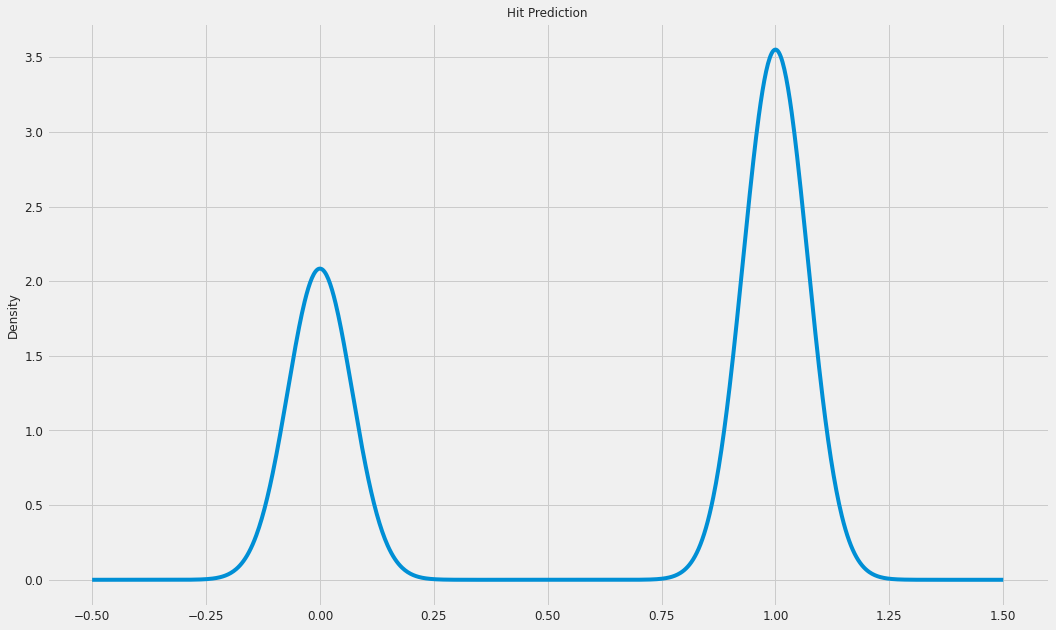

In [56]:
_ = df[TARGET_COL].plot(kind="density",title="Hit Prediction")

In [57]:
df['mode'].unique()

array([   0,    1, -999])

In [58]:
df[df['mode'] == -999]
#As there are various columns which too have -999 as missing value replacement so we will drop all these rows.

spotify_id                                artist              song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms  mode  target
535   25GGO9smjIokUfybfSPJvg                            Luke Bryan                   Fast       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1
1198  7mm58ooRsBAWLp2Y5A1LD5                            Luke Bryan         Roller Coaster       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1
1518  0Mws4X4pR5AiPeXh4kJkrj                       Lady Antebellum           Goodbye Town       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1
1533  3sJiureNyOxdGlIQmBURmz                       Little Big Town   Your Side Of The Bed       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1
1624  5aZ9NwKNJC7suyrWtPWWDd                       Little Big Town                Tornado       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1
1673  5eVO5USUe3N7v4xuq5XWoG                            Luke Bryan  Kiss Tomorrow Goodbye       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1
1964  3DtWNUSZPPHJAp2ORzby9B                         George Strait   Here For A Good Time       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1
2162  6ccqcwuXcsjlTGLvkEuKro                       Lady Antebellum            Hello World       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1
3553  71OUwu0jIPkwG3S37YN756                        Wisin & Yandel        Llame Pa' Verte       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1
7670  7z3oqnxoBgK24tzXj661p0  Luke Bryan Featuring Karen Fairchild     Home Alone Tonight       -999.00 -999.00 -999   -999.00      -999.00       -999.00           -999.00   -999.00  -999.00 -999.00         -999  -999       1

In [59]:
df[df['mode'] == -999].value_counts().sum()
# Total 10 rows (-999)

10

In [60]:
#Droping rows
df.drop([535,1198,1518,1533,1624,1673,1964,2162,3553,7670],axis=0,inplace=True)

In [61]:
#resetting index after droping above rows
df = df.reset_index()
df

index              spotify_id               artist                         song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
0          0  285pBltuF7vW8TeWk8hdRR           Juice WRLD                      Lucid Dreams          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0       1
1          1  7dt6x5M1jzdTEt8oCbisTK          Post Malone                        Better Now          0.68    0.58   10     -5.80         0.04          0.33              0.00      0.14     0.34 145.04       231267     1       1
2          2  78QR3Wp35dqAhFEc2qAGjE     Lil Baby & Gunna                     Drip Too Hard          0.90    0.66    1     -6.90         0.29          0.09              0.00      0.53     0.39 112.51       145543     0       1
3          3  2xLMifQCjDGFmkHkpNLD9h         Travis Scott                        Sicko Mode          0.83    0.73    8     -3.71         0.22          0.01              0.00      0.12     0.45 155.01       312820     1       1
4          4  2iUXsYOEPhVqEBwsqP70rE  5 Seconds Of Summer                        Youngblood          0.60    0.85    7     -5.11         0.46          0.02              0.00      0.12     0.15 120.27       203418     0       1
...      ...                     ...                  ...                               ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...     ...
14732  14742  7xV2k7FEMtUT4IUu4L87it     David Arkenstone               The Forgotten Lands          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1       0
14733  14743  3e0tyTV5FiV1bcYeRjdDz2            Moonspell                    The Hanged Man          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0       0
14734  14744  2CQwzG5nbS7ys8CHSlavVg  Seventh Day Slumber                    Shattered Life          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0       0
14735  14745  0MS1NrmBWaCpPLFEXV0VMZ        It Dies Today       One the road (to Damnation)          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1       0
14736  14746  62wqW6Q9eTozrruWPt9Z9i       Danny Williams  The Wonderful World Of The Young          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1       0

[14737 rows x 17 columns]

In [62]:
df.head(1)

index              spotify_id      artist     song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
0      0  285pBltuF7vW8TeWk8hdRR  Juice WRLD  Lucid Dreams          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0       1

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14737 entries, 0 to 14736
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             14737 non-null  int64  
 1   spotify_id        14737 non-null  object 
 2   artist            14735 non-null  object 
 3   song_name         14736 non-null  object 
 4   danceability      14737 non-null  float64
 5   energy            14737 non-null  float64
 6   key               14737 non-null  int64  
 7   loudness          14737 non-null  float64
 8   speechiness       14737 non-null  float64
 9   acousticness      14737 non-null  float64
 10  instrumentalness  14737 non-null  float64
 11  liveness          14737 non-null  float64
 12  valence           14737 non-null  float64
 13  tempo             14737 non-null  float64
 14  duration_ms       14737 non-null  int64  
 15  mode              14737 non-null  int64  
 16  target            14737 non-null  int64 

In [64]:
df.isnull().sum().sort_values(ascending = False)

artist              2
song_name           1
target              0
loudness            0
spotify_id          0
danceability        0
energy              0
key                 0
speechiness         0
mode                0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
index               0
dtype: int64

In [65]:
#Null rows in artist column
df[df['artist'].isnull()]

index              spotify_id artist song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
2724   2732  5GdRECFihmmONuvv474HTs    NaN       NaN          0.61    0.96    9     -4.32         0.10          0.00              0.00      0.17     0.71 139.84        82880     1       1
5198   5207  0klrZZl1I5FyKAebdWDsGf    NaN         N          0.58    0.15    2    -19.04         0.07          0.99              0.80      0.05     0.77 103.32       185893     0       1

In [66]:
#Null row in song_name
df[df['song_name'].isnull()]

index              spotify_id artist song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
2724   2732  5GdRECFihmmONuvv474HTs    NaN       NaN          0.61    0.96    9     -4.32         0.10          0.00              0.00      0.17     0.71 139.84        82880     1       1

In [67]:
#Droping above rows
df.drop([2724,5198],axis=0,inplace=True)

In [68]:
df.nunique()

index               14735
spotify_id          14735
artist               6875
song_name           13198
danceability          976
energy               1191
key                    12
loudness             8443
speechiness          1534
acousticness         3779
instrumentalness     4066
liveness             1757
valence              1361
tempo               12662
duration_ms         10188
mode                    2
target                  2
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14735 entries, 0 to 14736
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             14735 non-null  int64  
 1   spotify_id        14735 non-null  object 
 2   artist            14735 non-null  object 
 3   song_name         14735 non-null  object 
 4   danceability      14735 non-null  float64
 5   energy            14735 non-null  float64
 6   key               14735 non-null  int64  
 7   loudness          14735 non-null  float64
 8   speechiness       14735 non-null  float64
 9   acousticness      14735 non-null  float64
 10  instrumentalness  14735 non-null  float64
 11  liveness          14735 non-null  float64
 12  valence           14735 non-null  float64
 13  tempo             14735 non-null  float64
 14  duration_ms       14735 non-null  int64  
 15  mode              14735 non-null  int64  
 16  target            14735 non-null  int64 

In [70]:
df.isnull().sum().sort_values(ascending = False)

target              0
loudness            0
spotify_id          0
artist              0
song_name           0
danceability        0
energy              0
key                 0
speechiness         0
mode                0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
index               0
dtype: int64

In [71]:
df.columns

Index(['index', 'spotify_id', 'artist', 'song_name', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode', 'target'], dtype='object')

In [72]:
## Spliting the train dataset into categorical and numerical features
def getFeatures(df):
    num_features = df.select_dtypes(include=[np.number])
    cat_features = df.select_dtypes(include=[np.object])
    return num_features,cat_features

In [73]:
num_features,cat_features = getFeatures(df)

In [74]:
num_features

index  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
0          0          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0       1
1          1          0.68    0.58   10     -5.80         0.04          0.33              0.00      0.14     0.34 145.04       231267     1       1
2          2          0.90    0.66    1     -6.90         0.29          0.09              0.00      0.53     0.39 112.51       145543     0       1
3          3          0.83    0.73    8     -3.71         0.22          0.01              0.00      0.12     0.45 155.01       312820     1       1
4          4          0.60    0.85    7     -5.11         0.46          0.02              0.00      0.12     0.15 120.27       203418     0       1
...      ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...     ...
14732  14742          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1       0
14733  14743          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0       0
14734  14744          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0       0
14735  14745          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1       0
14736  14746          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1       0

[14735 rows x 14 columns]

In [75]:
cat_features

spotify_id               artist                         song_name
0      285pBltuF7vW8TeWk8hdRR           Juice WRLD                      Lucid Dreams
1      7dt6x5M1jzdTEt8oCbisTK          Post Malone                        Better Now
2      78QR3Wp35dqAhFEc2qAGjE     Lil Baby & Gunna                     Drip Too Hard
3      2xLMifQCjDGFmkHkpNLD9h         Travis Scott                        Sicko Mode
4      2iUXsYOEPhVqEBwsqP70rE  5 Seconds Of Summer                        Youngblood
...                       ...                  ...                               ...
14732  7xV2k7FEMtUT4IUu4L87it     David Arkenstone               The Forgotten Lands
14733  3e0tyTV5FiV1bcYeRjdDz2            Moonspell                    The Hanged Man
14734  2CQwzG5nbS7ys8CHSlavVg  Seventh Day Slumber                    Shattered Life
14735  0MS1NrmBWaCpPLFEXV0VMZ        It Dies Today       One the road (to Damnation)
14736  62wqW6Q9eTozrruWPt9Z9i       Danny Williams  The Wonderful World Of The Young

[14735 rows x 3 columns]

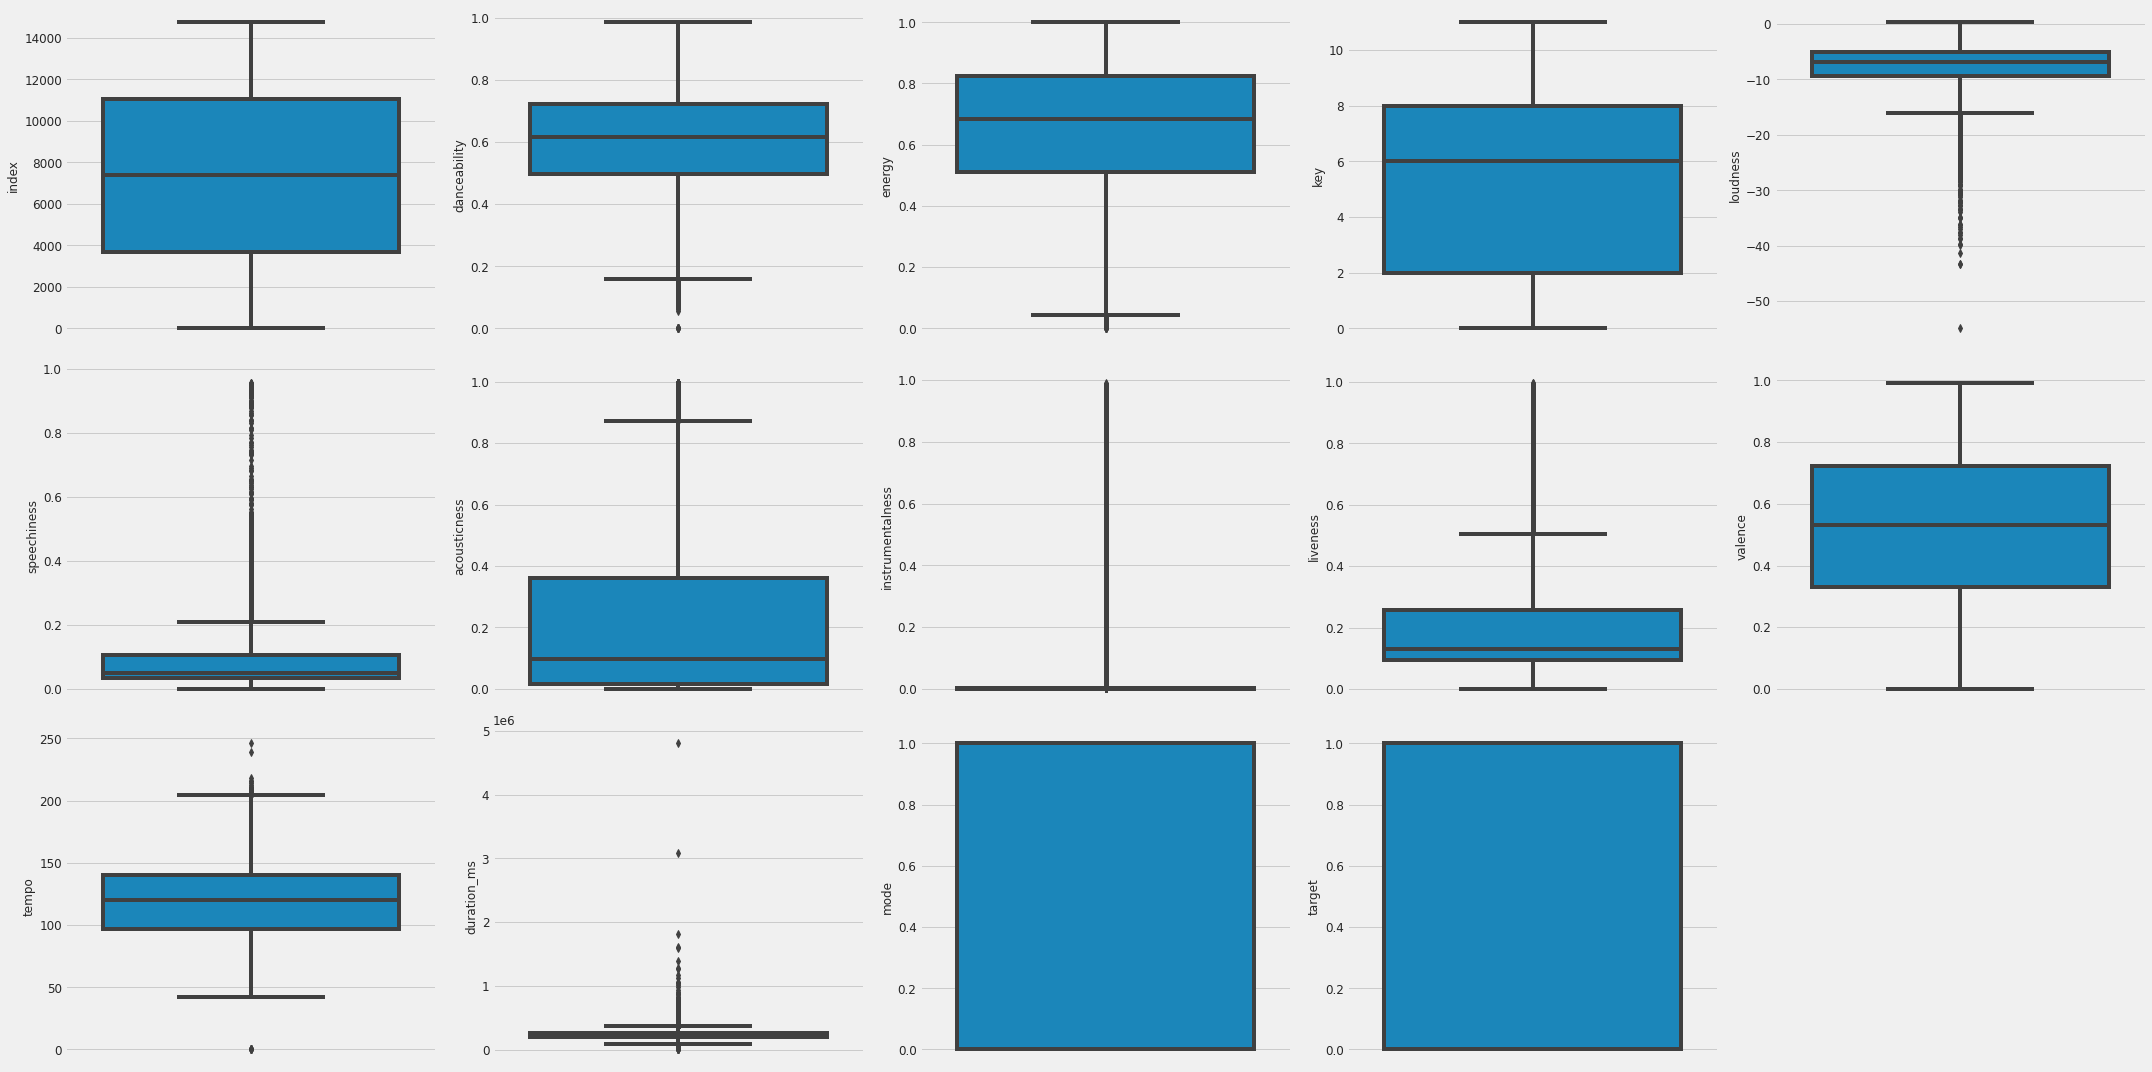

In [76]:
## Box plot of numerical features
fig = plt.figure(figsize=(30,20))
for i in range(len(num_features.columns)):
    fig.add_subplot(4,5,i+1)
    sns.boxplot(y = num_features.iloc[:,i])
plt.tight_layout()
plt.show()

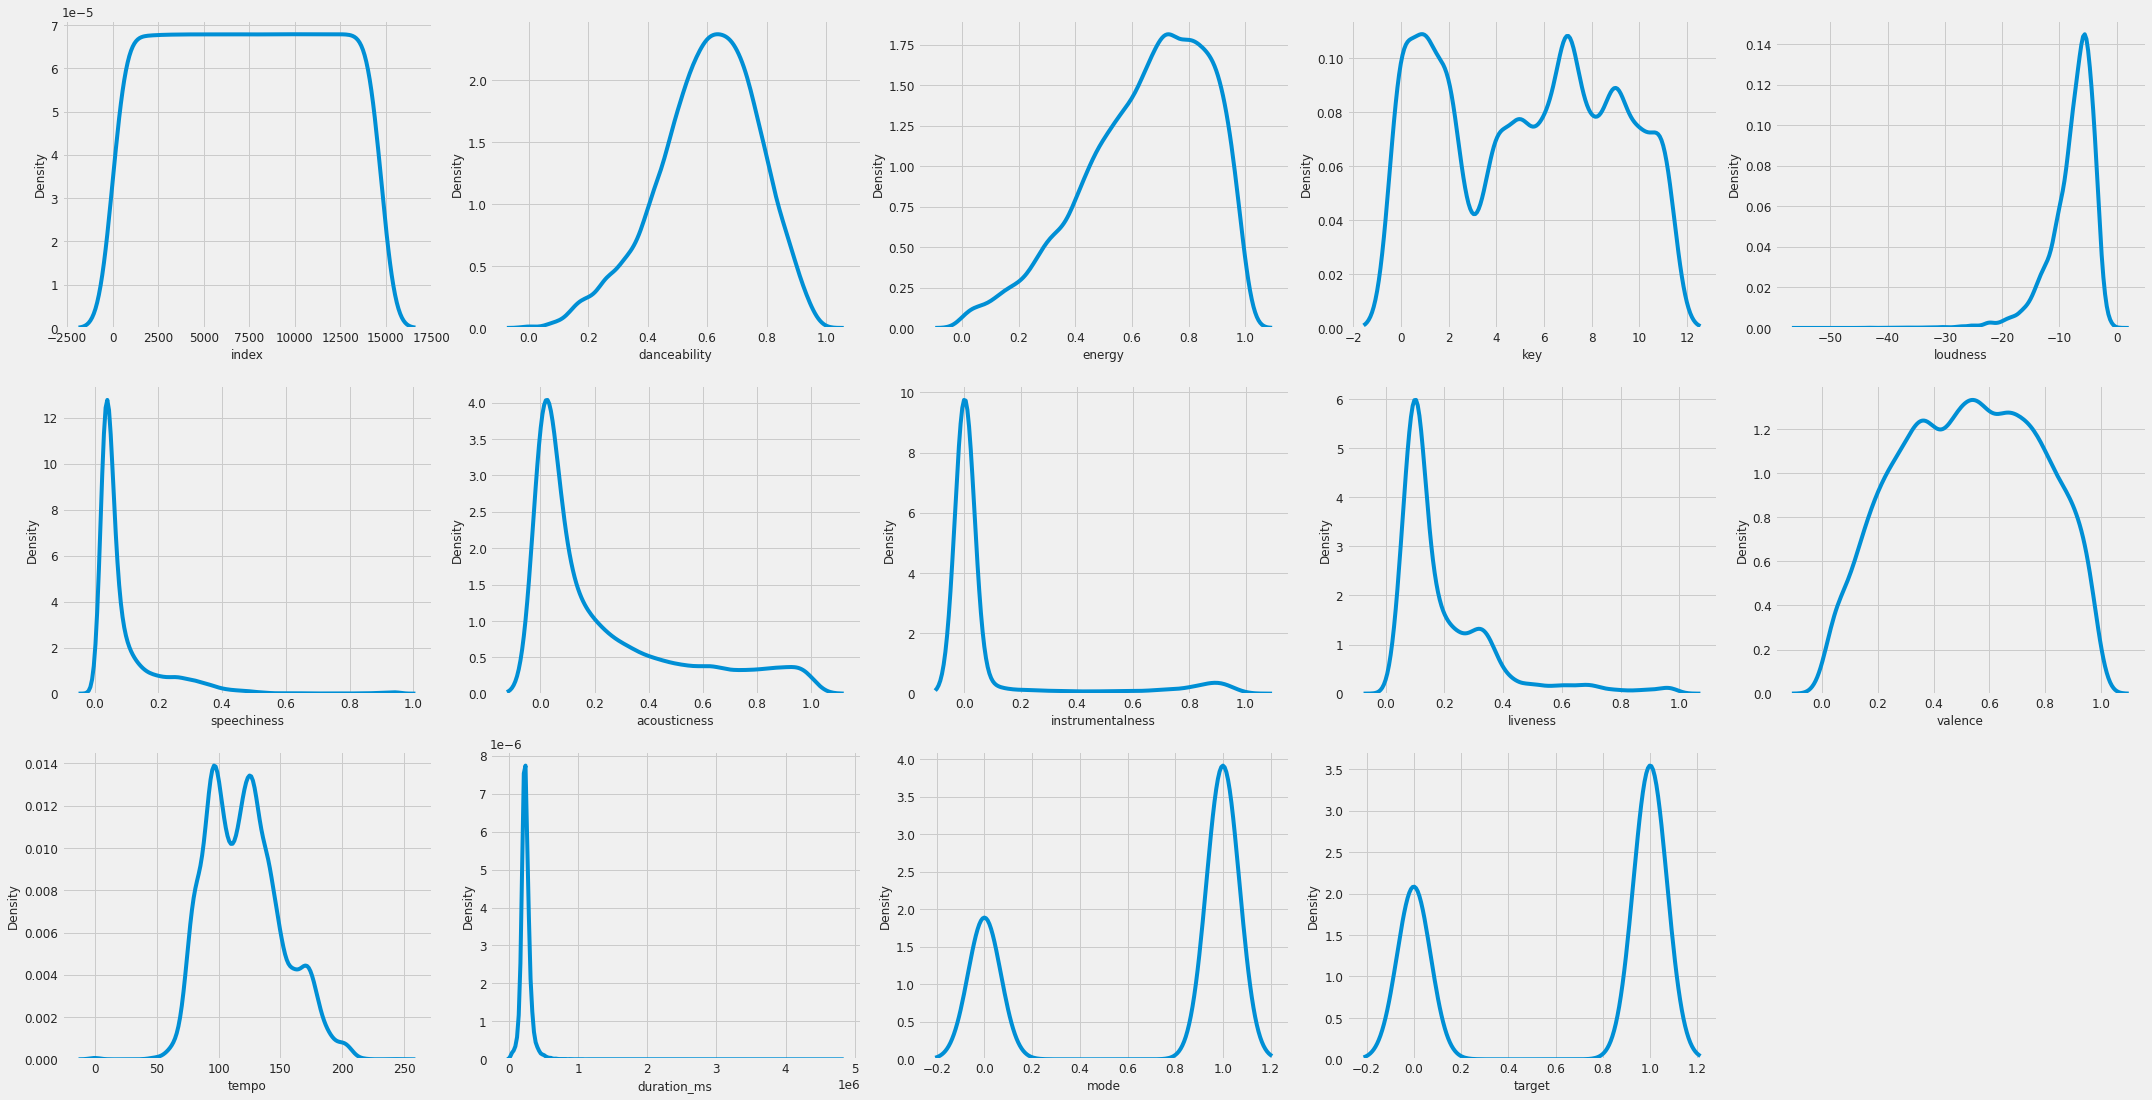

In [77]:
fig = plt.figure(figsize=(30,20))
for i in range(len(num_features.columns)):
    fig.add_subplot(4,5,i+1)
    sns.kdeplot(y = num_features.iloc[:,i],vertical=True)
plt.tight_layout()
plt.show()

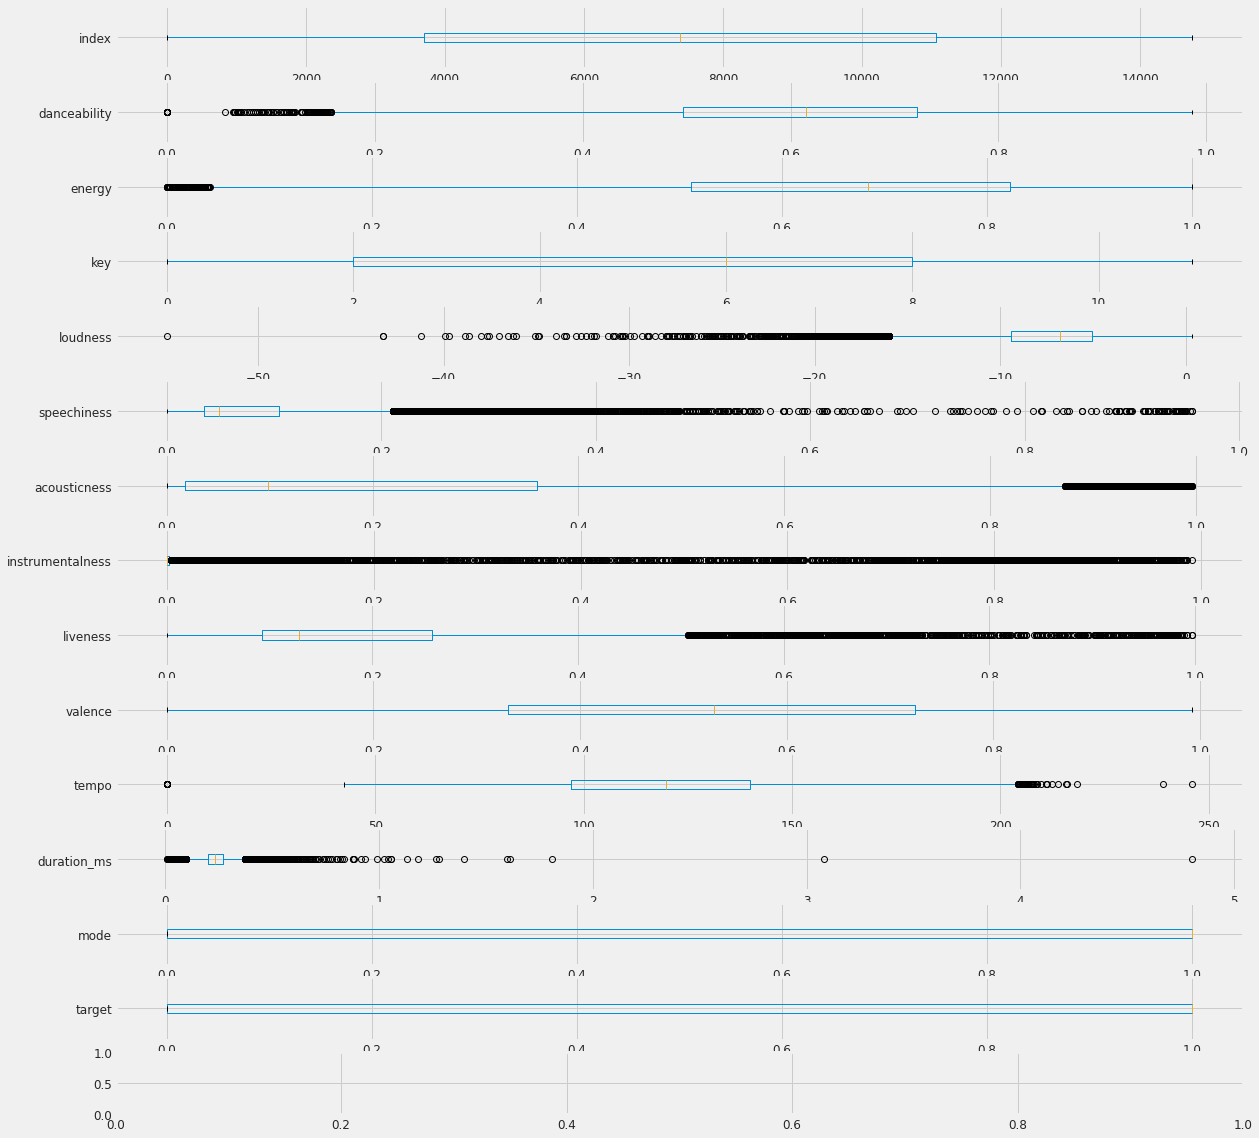

In [78]:
fig, axes = plt.subplots(15, 1, figsize=(18, 19))
for i, c in enumerate(num_features):
  _ = df[[c]].boxplot(ax=axes[i], vert=False)

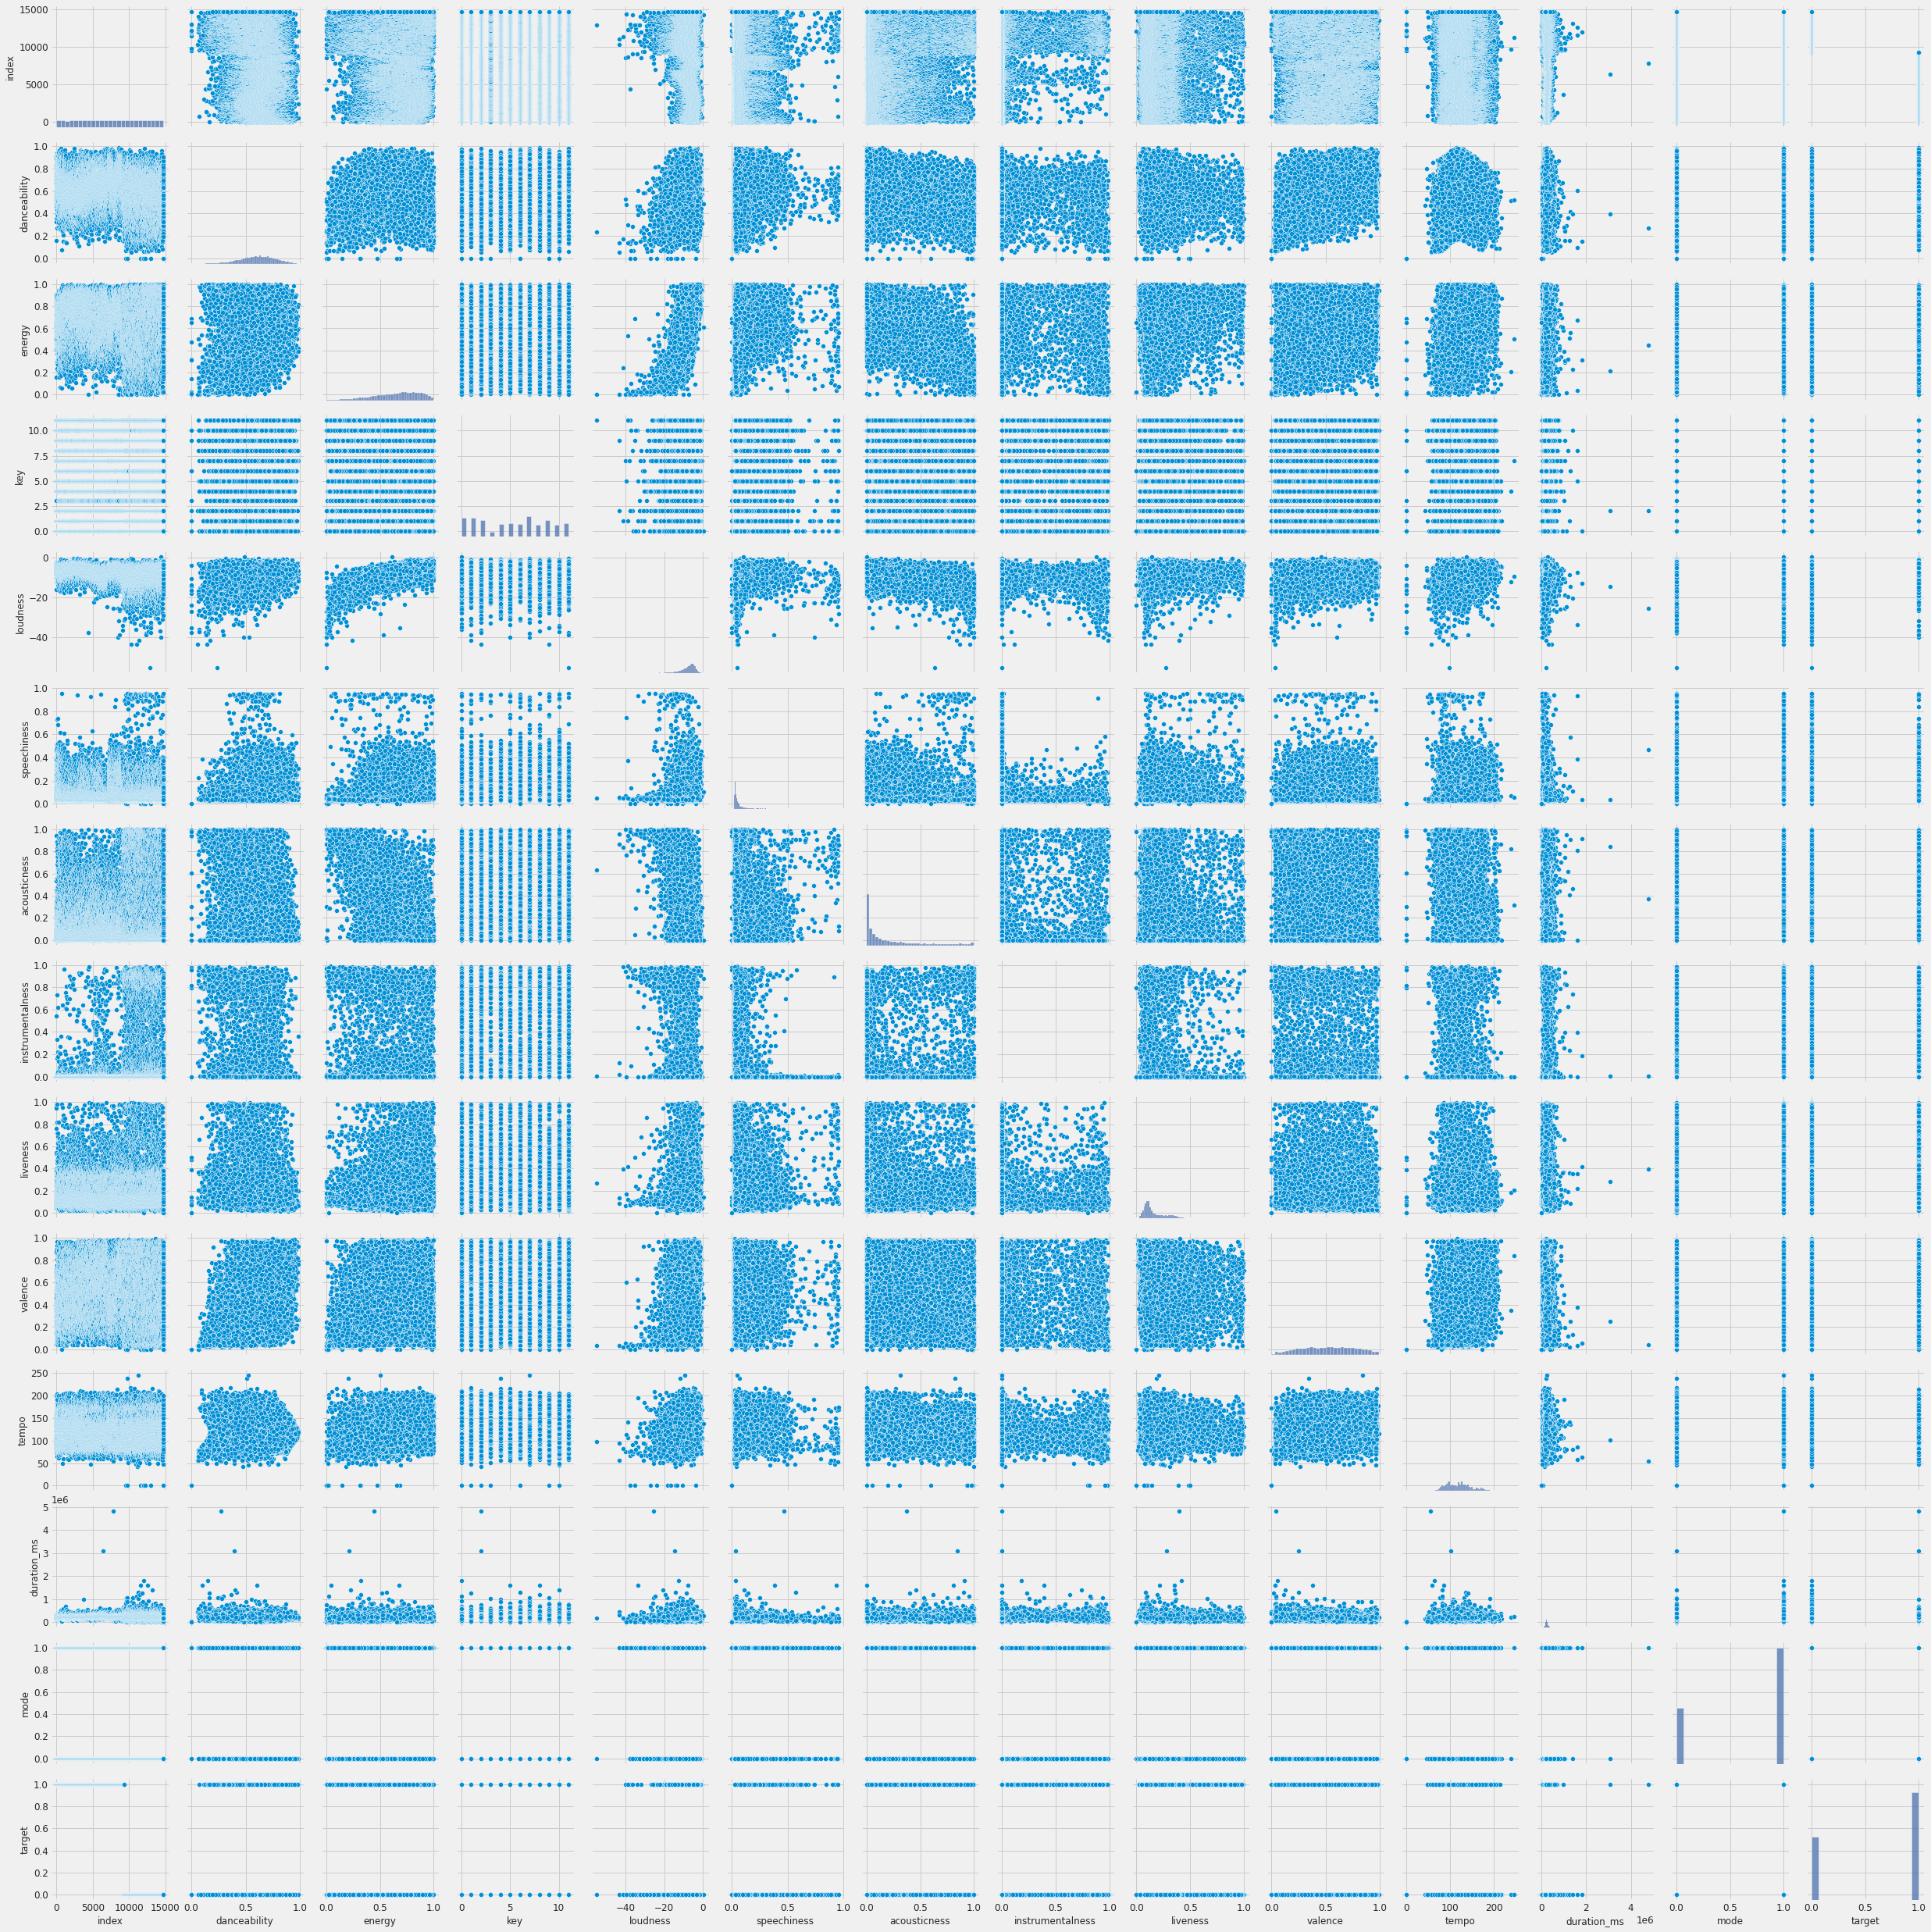

In [79]:
sns.pairplot(df)
plt.show()

In [80]:
skew_features = num_features.apply(lambda x :x.skew()).sort_values(ascending=True)
skew_features

loudness           -2.09
mode               -0.74
energy             -0.63
target             -0.54
danceability       -0.45
valence            -0.07
key                -0.01
index              -0.00
tempo               0.43
acousticness        1.27
liveness            2.18
instrumentalness    2.77
speechiness         3.20
duration_ms        13.09
dtype: float64

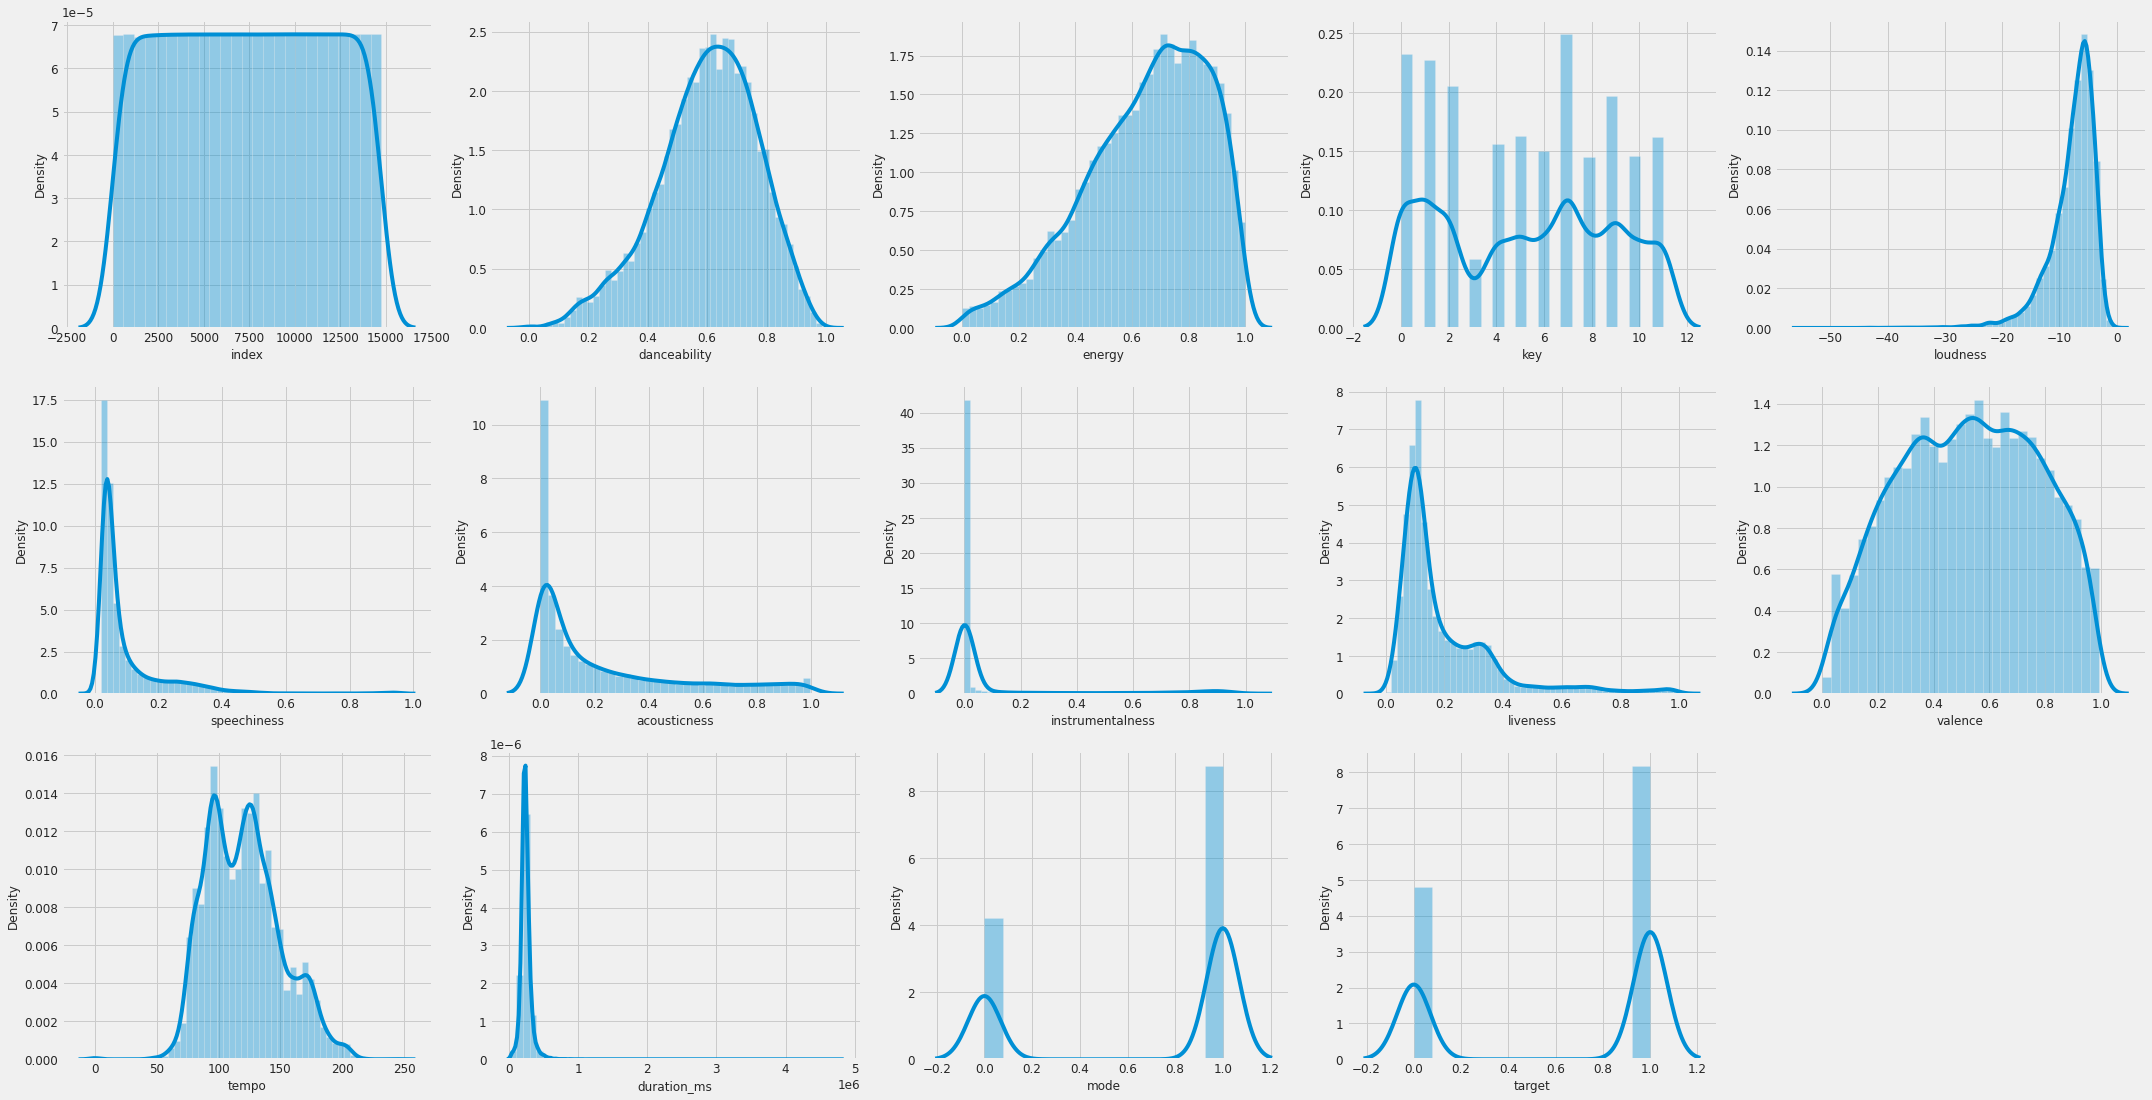

In [81]:
## Dist plot of numerical features
fig = plt.figure(figsize=(30,20))
for i in range(len(num_features.columns)):
    fig.add_subplot(4,5,i+1)
    sns.distplot( num_features.iloc[:,i])
plt.tight_layout()
plt.show()

In [82]:
df

index              spotify_id               artist                         song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
0          0  285pBltuF7vW8TeWk8hdRR           Juice WRLD                      Lucid Dreams          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0       1
1          1  7dt6x5M1jzdTEt8oCbisTK          Post Malone                        Better Now          0.68    0.58   10     -5.80         0.04          0.33              0.00      0.14     0.34 145.04       231267     1       1
2          2  78QR3Wp35dqAhFEc2qAGjE     Lil Baby & Gunna                     Drip Too Hard          0.90    0.66    1     -6.90         0.29          0.09              0.00      0.53     0.39 112.51       145543     0       1
3          3  2xLMifQCjDGFmkHkpNLD9h         Travis Scott                        Sicko Mode          0.83    0.73    8     -3.71         0.22          0.01              0.00      0.12     0.45 155.01       312820     1       1
4          4  2iUXsYOEPhVqEBwsqP70rE  5 Seconds Of Summer                        Youngblood          0.60    0.85    7     -5.11         0.46          0.02              0.00      0.12     0.15 120.27       203418     0       1
...      ...                     ...                  ...                               ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...     ...
14732  14742  7xV2k7FEMtUT4IUu4L87it     David Arkenstone               The Forgotten Lands          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1       0
14733  14743  3e0tyTV5FiV1bcYeRjdDz2            Moonspell                    The Hanged Man          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0       0
14734  14744  2CQwzG5nbS7ys8CHSlavVg  Seventh Day Slumber                    Shattered Life          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0       0
14735  14745  0MS1NrmBWaCpPLFEXV0VMZ        It Dies Today       One the road (to Damnation)          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1       0
14736  14746  62wqW6Q9eTozrruWPt9Z9i       Danny Williams  The Wonderful World Of The Young          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1       0

[14735 rows x 17 columns]

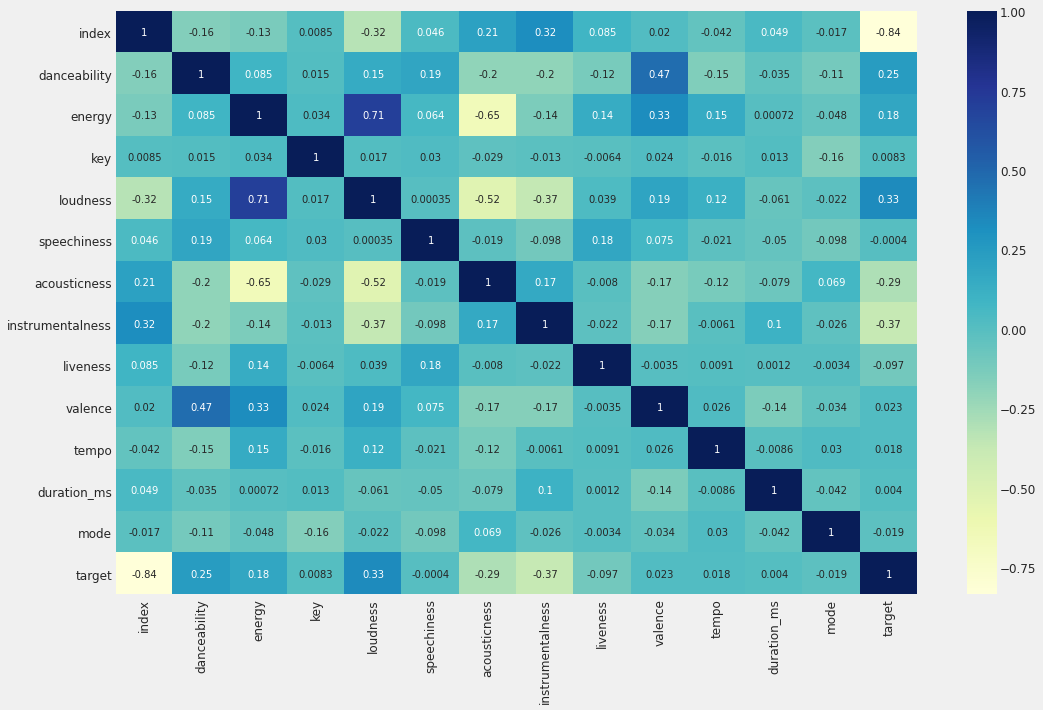

In [83]:
#loudness and energy are highly corelated , so we will drop one of them later
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [84]:
#top 10 artists with max songs which make billbord hits
df['artist'].value_counts().head(10)

Glee Cast        147
Drake             76
Taylor Swift      66
Eminem            39
Tim McGraw        39
Kenny Chesney     37
Justin Bieber     36
Madonna           35
Rascal Flatts     33
Keith Urban       32
Name: artist, dtype: int64

In [85]:
#top 10 most common song name used by different artists
df['song_name'].value_counts().head(10)

Hold On       10
Hallelujah    10
Intro         10
Home          10
Smile         10
Believe        9
Angel          9
You            9
Crazy          8
Stay           8
Name: song_name, dtype: int64

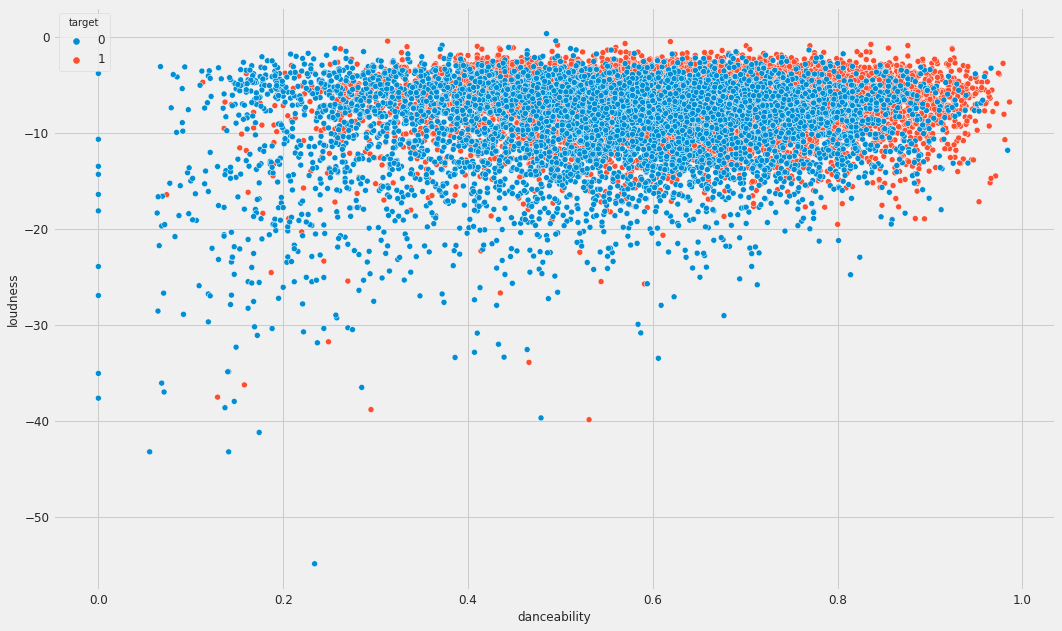

In [86]:
sns.scatterplot(x='danceability',y='loudness',hue='target',data=df)

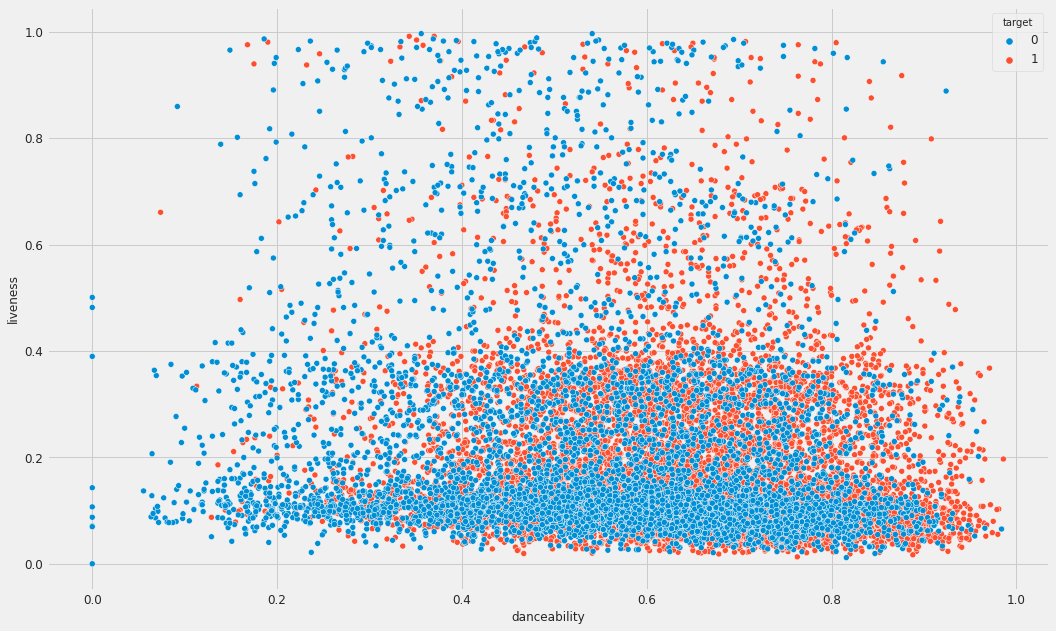

In [87]:
sns.scatterplot(x='danceability',y='liveness',hue='target',data=df)

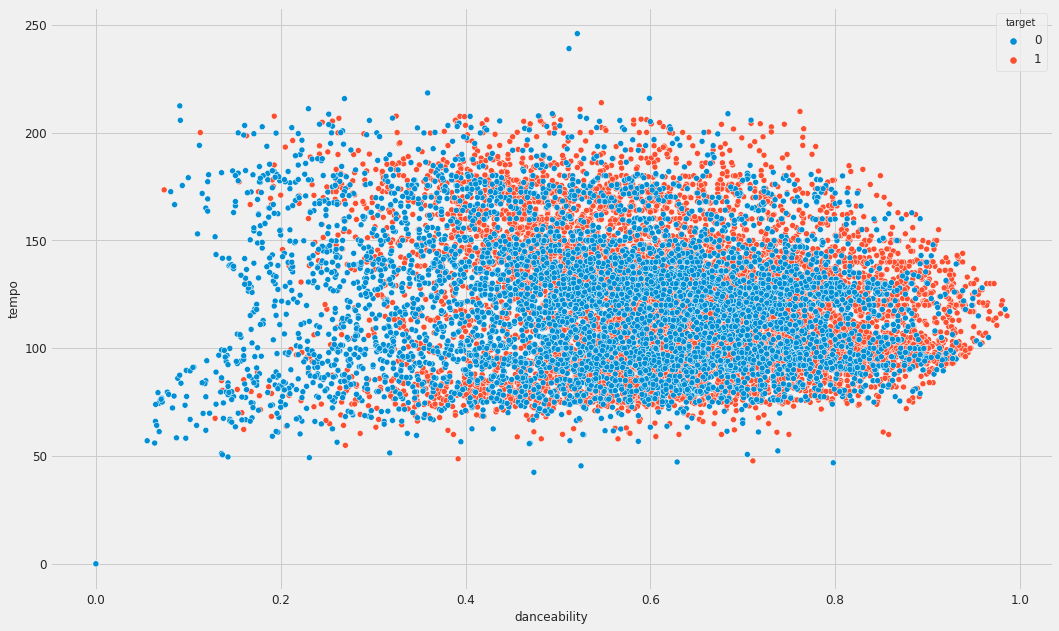

In [88]:
sns.scatterplot(x='danceability',y='tempo',hue='target',data=df)

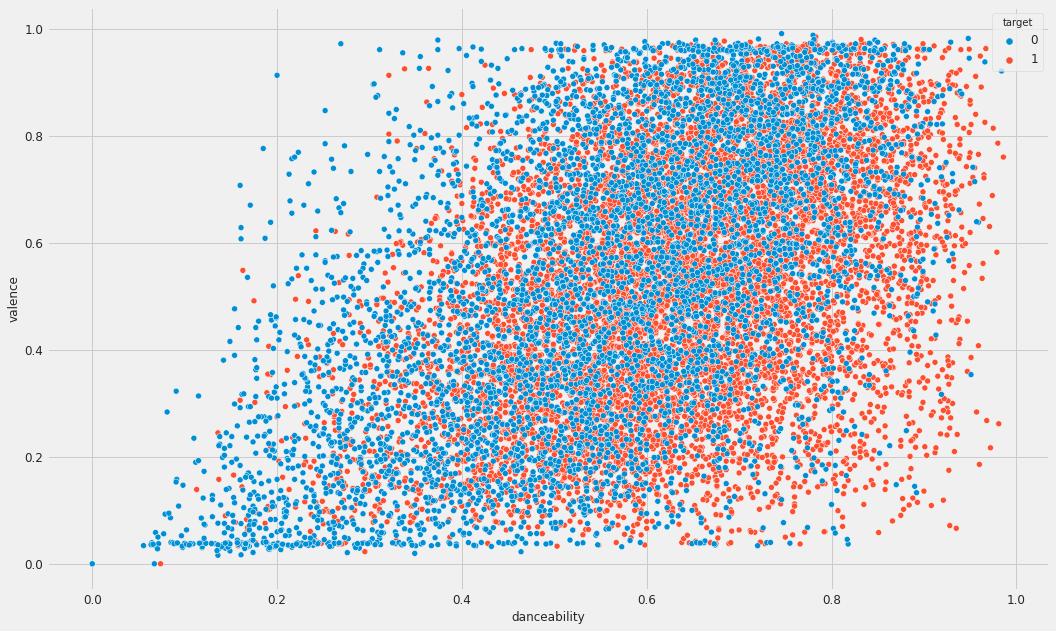

In [89]:
sns.scatterplot(x='danceability',y='valence',hue='target',data=df)

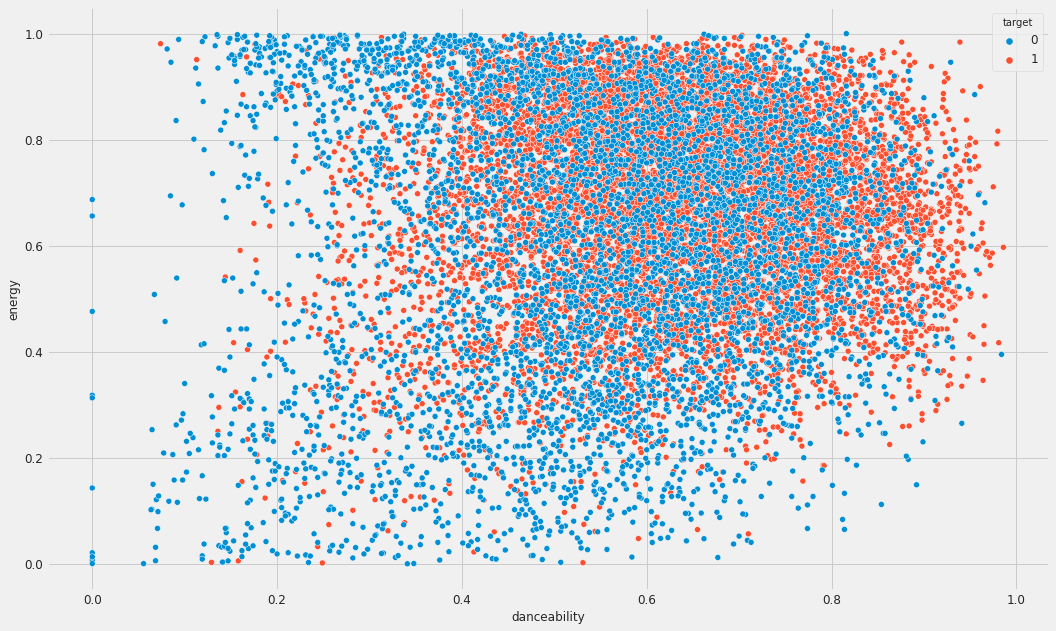

In [90]:
sns.scatterplot(x='danceability',y='energy',hue='target',data=df)

In [91]:
cat_features

spotify_id               artist                         song_name
0      285pBltuF7vW8TeWk8hdRR           Juice WRLD                      Lucid Dreams
1      7dt6x5M1jzdTEt8oCbisTK          Post Malone                        Better Now
2      78QR3Wp35dqAhFEc2qAGjE     Lil Baby & Gunna                     Drip Too Hard
3      2xLMifQCjDGFmkHkpNLD9h         Travis Scott                        Sicko Mode
4      2iUXsYOEPhVqEBwsqP70rE  5 Seconds Of Summer                        Youngblood
...                       ...                  ...                               ...
14732  7xV2k7FEMtUT4IUu4L87it     David Arkenstone               The Forgotten Lands
14733  3e0tyTV5FiV1bcYeRjdDz2            Moonspell                    The Hanged Man
14734  2CQwzG5nbS7ys8CHSlavVg  Seventh Day Slumber                    Shattered Life
14735  0MS1NrmBWaCpPLFEXV0VMZ        It Dies Today       One the road (to Damnation)
14736  62wqW6Q9eTozrruWPt9Z9i       Danny Williams  The Wonderful World Of The Young

[14735 rows x 3 columns]

In [92]:
artists_songs = cat_features.groupby(['artist']).sum()

In [93]:
artists_songs.head(10)

spotify_id                                          song_name
artist                                                                                                                        
 Breathe Out                                         5814jzrHefsg0fCpJ9BJuQ                                        I Breathe I
 Love It                       2C2zI32nDnokpnCkzyvjCv34iRIRrwcT8q6uF1345Xtd                             I Don't Like II Like I
 Love You                                            09FQGqs5RYTvYavAMZLYca                                               Hell
!!!                                                  19plwOsYLdF68361d17aAb                                         Myth Takes
"Weird Al" Yankovic       4JqQWAr47pGEoaMArpA7Z360R2v9lheAu3lwZwAFxMZK1g...  Word CrimesWhite & NerdyCanadian IdiotAmish Pa...
'N Sync                   4CbSv21o6jH6Ir7zQHaRiI470Tst3OcdbzsHUrItFzsK77...  GonePopIt's Gonna Be MeBye Bye ByeTearin' Up M...
'N Sync & Gloria Estefan                             7vCdNpndSQZS4TQkFEAfd3                                  Music Of My Heart
'N Sync Featuring Nelly                              0ILyUXY2GAjCcjuOpkLNML                                         Girlfriend
'm Coming Home                                       4plZmXOkcwh3UMmLZkPZOJ                                                Mam
've Been Hurt                                        4GEDMfSOqkvNsS4UvfEJ9O                                                Gir

In [94]:
num_features

index  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
0          0          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0       1
1          1          0.68    0.58   10     -5.80         0.04          0.33              0.00      0.14     0.34 145.04       231267     1       1
2          2          0.90    0.66    1     -6.90         0.29          0.09              0.00      0.53     0.39 112.51       145543     0       1
3          3          0.83    0.73    8     -3.71         0.22          0.01              0.00      0.12     0.45 155.01       312820     1       1
4          4          0.60    0.85    7     -5.11         0.46          0.02              0.00      0.12     0.15 120.27       203418     0       1
...      ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...     ...
14732  14742          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1       0
14733  14743          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0       0
14734  14744          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0       0
14735  14745          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1       0
14736  14746          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1       0

[14735 rows x 14 columns]

In [95]:
df

index              spotify_id               artist                         song_name  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  mode  target
0          0  285pBltuF7vW8TeWk8hdRR           Juice WRLD                      Lucid Dreams          0.51    0.57    6     -7.23         0.20          0.35              0.00      0.34     0.22  83.90       239836     0       1
1          1  7dt6x5M1jzdTEt8oCbisTK          Post Malone                        Better Now          0.68    0.58   10     -5.80         0.04          0.33              0.00      0.14     0.34 145.04       231267     1       1
2          2  78QR3Wp35dqAhFEc2qAGjE     Lil Baby & Gunna                     Drip Too Hard          0.90    0.66    1     -6.90         0.29          0.09              0.00      0.53     0.39 112.51       145543     0       1
3          3  2xLMifQCjDGFmkHkpNLD9h         Travis Scott                        Sicko Mode          0.83    0.73    8     -3.71         0.22          0.01              0.00      0.12     0.45 155.01       312820     1       1
4          4  2iUXsYOEPhVqEBwsqP70rE  5 Seconds Of Summer                        Youngblood          0.60    0.85    7     -5.11         0.46          0.02              0.00      0.12     0.15 120.27       203418     0       1
...      ...                     ...                  ...                               ...           ...     ...  ...       ...          ...           ...               ...       ...      ...    ...          ...   ...     ...
14732  14742  7xV2k7FEMtUT4IUu4L87it     David Arkenstone               The Forgotten Lands          0.56    0.53    9    -14.59         0.03          0.46              0.88      0.31     0.71 141.96       314533     1       0
14733  14743  3e0tyTV5FiV1bcYeRjdDz2            Moonspell                    The Hanged Man          0.40    0.64    4     -8.80         0.03          0.06              0.65      0.08     0.10 140.10       386333     0       0
14734  14744  2CQwzG5nbS7ys8CHSlavVg  Seventh Day Slumber                    Shattered Life          0.41    0.90    2     -5.28         0.06          0.00              0.00      0.12     0.28 150.33       209693     0       0
14735  14745  0MS1NrmBWaCpPLFEXV0VMZ        It Dies Today       One the road (to Damnation)          0.33    0.96    4     -3.50         0.14          0.00              0.00      0.22     0.21 116.85       179413     1       0
14736  14746  62wqW6Q9eTozrruWPt9Z9i       Danny Williams  The Wonderful World Of The Young          0.19    0.25    8    -12.96         0.04          0.94              0.00      0.10     0.31 179.31       169333     1       0

[14735 rows x 17 columns]